In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

sys.path.append(os.path.join(os.getcwd(), '../symlie'))
sys.path.append(os.path.join(os.getcwd(), '../sympdee/sympde/viz'))
sys.path.append(os.path.join(os.getcwd(), '..'))

from symlie.model.networks.linear import CalculatedP, LinearP
from symlie.model.networks.implicit import LinearImplicit
from sympdee.sympde.viz.general_plots import imshows, plot_vals, simple_imshow, savefig, simple_imshow
from symlie.misc.utils_results import get_and_check_Ps, plot_seeds_and_Ps
from symlie.data.transforms import Transform

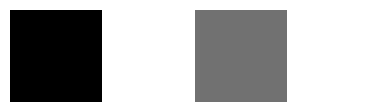

In [2]:
x = torch.randn((1,4))
size = x.shape[-1]
imshows([x], axis_off = True, imshow_kwargs={'cmap': 'gray'}, rows = False)

In [6]:
# Initializing the custom linear layer with the mapping P for a convolutional kernel 
linear_implicit = LinearImplicit(
    in_features = size, out_features = size, bias = False,
    hidden_implicit_layers = [10, 10],
    train_weights = False, train_P = True
)
                                 

# # Setting the weights of the linear layer to be the same as the convolutional kernel
# linear_conv.weight.data.flatten()[:kernel_size] = conv.weight.squeeze()

# assert torch.allclose(linear_conv(x, normalize_P=False), out_conv)

implicit_P = linear_implicit.implicit_P

In [8]:
implicit_P.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0314,  0.0321, -0.0765,  0.0949, -0.0801, -0.1379,  0.2494, -0.0271,
                       -0.0307, -0.1533, -0.2260, -0.0947, -0.1188, -0.0512, -0.0848, -0.2089],
                      [ 0.0159, -0.1253,  0.0388,  0.2445, -0.1924,  0.1633, -0.0272,  0.1049,
                       -0.0651,  0.0800, -0.2130, -0.1068,  0.1551,  0.0827,  0.1283, -0.2276],
                      [ 0.2040, -0.0008, -0.1550,  0.1802,  0.1033, -0.1649,  0.1324,  0.2162,
                        0.1896, -0.2289, -0.2001,  0.1446, -0.2245,  0.1990,  0.1261, -0.2234],
                      [-0.1014, -0.0064,  0.2409, -0.0432,  0.0613,  0.1904,  0.0740,  0.1354,
                       -0.1945, -0.2232, -0.1018, -0.1854,  0.1437,  0.1259, -0.1017,  0.0542],
                      [-0.0233,  0.0506,  0.0728,  0.1179, -0.2217,  0.0042, -0.1360, -0.1437,
                        0.1826, -0.1152, -0.1862, -0.2324, -0.1627, -0.2375,  0.1305,  0.1901],
                   

In [57]:
for name, param in linear_implicit.implicit_P.named_parameters():
    print(name, param.requires_grad)

linear_implicit.weight.requires_grad

0.weight True
0.bias True
2.weight True
2.bias True
4.weight True
4.bias True


False

In [60]:
linear_implicit(x)

tensor([[0.0666, 0.3869, 0.0000, 0.1926]], grad_fn=<MmBackward0>)